<a href="https://colab.research.google.com/github/swarnava-96/Cotton-Disease-Prediction/blob/main/Cotton_Disease_Prediction_using_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cotton Disease Prediction using Transfer Lerning**
The goal of this project is to classify whether cotton leaves or plants having disease or not using deep learning techniques.

In [3]:
cd "/content/drive/MyDrive/Cotton Disease"

/content/drive/MyDrive/Cotton Disease


In [5]:
# Installing tensorflow==2.5.0
!pip install tensorflow==2.5.0

In [6]:
# Importing the necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Resizing images
IMAGE_SIZE = [224,224]

In [8]:
# Setting the train and test path
train_path = "/content/drive/MyDrive/Cotton Disease/train" 
valid_path = "/content/drive/MyDrive/Cotton Disease/test"

In [9]:
# Importing the InceptionV3 library and using the imagenet weights
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

87916544/87910968 [==============================] - 1s 0us/step


In [10]:
# We will not train the existing weights
for layer in inception.layers:
  layer.trainable = False

In [11]:
# Lets get the number of classes
folders = glob("/content/drive/MyDrive/Cotton Disease/train/*")

In [12]:
# Initializing the final layer
x = Flatten()(inception.output)

In [13]:
# Creating the final layer
prediction = Dense(len(folders), activation = "softmax")(x)

In [14]:
# Creating the model object
model = Model(inputs = inception.input, outputs = prediction)

In [15]:
# Lets see the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
# Setting the model cost function, optimizer and metrics
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [17]:
# Importing the images from the datasets
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Making sure that the same target size is provided as initiated for the image size
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Cotton Disease/train",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Cotton Disease/test",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 18 images belonging to 4 classes.


In [20]:
# Model Training
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 714s 12s/step - loss: 2.2414 - accuracy: 0.7422 - val_loss: 0.4994 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 210s 3s/step - loss: 0.6174 - accuracy: 0.8949 - val_loss: 0.4040 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 209s 3s/step - loss: 0.5437 - accuracy: 0.9083 - val_loss: 0.2541 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 209s 3s/step - loss: 0.4294 - accuracy: 0.9334 - val_loss: 0.4682 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 208s 3s/step - loss: 0.6462 - accuracy: 0.9077 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 209s 3s/step - loss: 0.4836 - accuracy: 0.9267 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 208s 3s/step - loss: 0.6134 - accuracy: 0.9262 - val_loss: 0.2466 - val_accuracy: 0.9444
Epoch 8/20
6

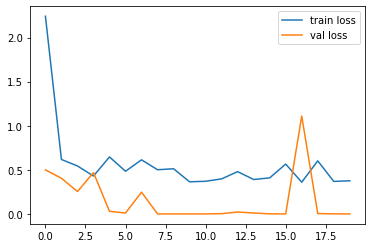

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

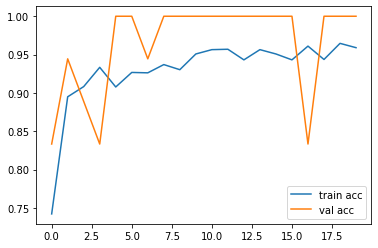

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# Saving the model file to reuse later
model.save('model_inception.h5')

In [24]:
# Prediction
y_pred = model.predict(test_set)

In [25]:
# Lets see the predicted values
y_pred

array([[3.5104959e-13, 4.3571494e-13, 1.0086469e-15, 1.0000000e+00],
       [8.4395840e-18, 2.7513910e-25, 1.0000000e+00, 4.0279065e-13],
       [1.0925645e-15, 5.6754863e-23, 1.0000000e+00, 3.8373800e-33],
       [4.9635816e-14, 7.2188490e-31, 1.0000000e+00, 8.4176794e-20],
       [3.0221783e-34, 1.0000000e+00, 3.1335620e-29, 7.4183230e-28],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.6720721e-20, 1.0000000e+00, 3.2592403e-18, 6.3262468e-12],
       [1.0000000e+00, 1.4990820e-13, 8.3211675e-27, 5.4079126e-21],
       [1.4935428e-20, 7.1696915e-10, 4.4405245e-22, 1.0000000e+00],
       [7.6133188e-12, 4.2181124e-16, 7.2894258e-20, 1.0000000e+00],
       [0.0000000e+00, 1.2539921e-18, 0.0000000e+00, 1.0000000e+00],
       [2.9169716e-36, 2.2465144e-37, 0.0000000e+00, 1.0000000e+00],
       [2.7676328e-33, 1.0000000e+00, 4.6939794e-21, 5.8042533e-22],
       [2.3642537e-22, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.2097257e-

In [28]:
# Lets see the prediced class
y_pred = np.argmax(y_pred, axis = 1)

AxisError: ignored

The above line code of code is throwing error because I mistakenly ran the code twice. Otherwise it will work fine, as the output of the above code can be clearly seen below.

In [29]:
y_pred

array([3, 2, 2, 2, 1, 1, 1, 0, 3, 3, 3, 3, 1, 2, 0, 2, 0, 1])

In [32]:
# Lets load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Cotton Disease/model_inception.h5')

In [33]:
# Testing
img=image.load_img('/content/drive/MyDrive/Cotton Disease/val/diseased cotton leaf/dis_leaf (118)_iaip.jpg',target_size=(224,224))

In [34]:
# Image to array
x=image.img_to_array(img)
x

array([[[130., 108.,  85.],
        [132., 111.,  90.],
        [127., 111.,  95.],
        ...,
        [181., 213., 130.],
        [185., 220., 164.],
        [197., 220., 150.]],

       [[144., 123., 102.],
        [135., 117.,  97.],
        [119., 103.,  87.],
        ...,
        [193., 222., 138.],
        [176., 210., 149.],
        [194., 217., 145.]],

       [[132., 116., 100.],
        [114.,  98.,  82.],
        [ 56.,  40.,  24.],
        ...,
        [171., 196., 112.],
        [168., 200., 127.],
        [186., 210., 134.]],

       ...,

       [[200., 211., 169.],
        [199., 210., 168.],
        [198., 209., 167.],
        ...,
        [171., 150., 123.],
        [180., 159., 132.],
        [161., 135., 110.]],

       [[196., 207., 165.],
        [200., 211., 169.],
        [202., 213., 171.],
        ...,
        [165., 144., 117.],
        [148., 127., 100.],
        [154., 128., 103.]],

       [[200., 215., 172.],
        [200., 215., 172.],
        [200., 2

In [35]:
# Lets see the image shape
x.shape

(224, 224, 3)

In [36]:
# Rescaling the image
x=x/255

In [37]:
# Expanding the dimensions
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
# Predicted values
model.predict(img_data)

array([[9.9977094e-01, 3.9218495e-08, 1.1976015e-05, 2.1716072e-04]],
      dtype=float32)

In [39]:
# Predicted class
a=np.argmax(model.predict(img_data), axis=1)
a

array([0])

The model correctly predicts and works amazingly as I have used an image from the validation dataset that was totally a new data.
